In [2]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [34]:
#屈折率
n_Air = 1
n_Si = 3.48

#slab厚さ
h = 0.5

#穴半径
r = 0.25

#計算する固有周波数の数
num_bands = 4

#メッシュの細かさ
resolution = 16

#計算間隔
interpolate = 12

#単位格子
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1, 10*h),
                              basis1=mp.Vector3(math.sqrt(3)/2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3)/2, -0.5))

#構造
#default_material = mp.Medium(epsilon=n_Si**2)
geometry = [
    mp.Block(material=mp.Medium(epsilon=n_Si**2),
             size=mp.Vector3(mp.inf, mp.inf, h)),
    mp.Cylinder(r, material=mp.Medium(epsilon=n_Air**2), height = h)
]

#ブリルアンゾーン
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(-1./3, 1./3),    # K
    mp.Vector3(y=0.5),          # M
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(interpolate, k_points)

In [20]:
#計算
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

#ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3),
#                               mpb.fix_efield_phase,
#                               mpb.output_efield_z))
#tm_freqs = ms.all_freqs
#tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 16 x 16 x 80.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 5)
Cell volume = 4.33013
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 0.2)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.25, height 0.5, axis (0, 0, 1)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
40 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<-0.02564102564102564, 0.02564102564102564, 0.0>
  Vector3<-0.05128205128205128, 0.05128205128205128, 0.0>
  Vector3<-0.07692307692307693, 0.0769

Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 9 iterations.
zevenfreqs:, 22, -0.128205, 0.435897, 0, 0.591413, 0.238742, 0.304098, 0.357236, 0.437076
elapsed time for k point: 0.27277207374572754
solve_kpoint (-0.102564,0.448718,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 8 iterations.
zevenfreqs:, 23, -0.102564, 0.448718, 0, 0.58639, 0.236789, 0.303348, 0.36299, 0.431364
elapsed time for k point: 0.25432300567626953
solve_kpoint (-0.0769231,0.461538,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 7 iterations.
zevenfreqs:, 24, -0.0769231, 0.461538, 0, 0.582452, 0.23522, 0.302766, 0.368309, 0.426077
elapsed time for k point: 0.23037099838256836
solve_kpoint (-0.0512821,0.474359,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 7 iterations.
zevenfreqs:, 25, -0.0512821, 0.474359, 0, 0.579623, 0.234072, 0.302352, 0.372843, 0.421564
elapsed time for k point: 0.2249007225036621
solve_kpoint (-0.

In [5]:
md = mpb.MPBData(rectify=True, periods=5, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

epsilon: 1-12.1104, mean 1.86205, harm. mean 1.08942, 9.40918% > 1, 7.75898% "fill"


(160, 139, 800)

In [6]:
#import csv
#with open('epsilon_distribution.csv', 'wt') as f:
#    writer = csv.writer(f)
#    writer.writerows(converted_eps)

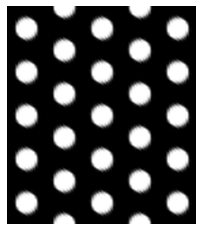

In [7]:
plt.imshow(converted_eps[:,:,400], interpolation='spline36', cmap="binary")
plt.axis('off')
plt.show()

In [21]:
import seaborn as sns

plt.figure(figsize=(16, 16))
sns.heatmap(converted_eps[:,:,200], annot=True, fmt=".1f", square=True, cmap = "YlGnBu")

ModuleNotFoundError: No module named 'seaborn'

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 16 x 16 x 80.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 5)
Cell volume = 4.33013
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 0.2)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.25, height 0.5, axis (0, 0, 1)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Solving for band polarization: zodd.
Initializing fields to random numbers...
40 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<-0.02564102564102564, 0.02564102564102564, 0.0>
  Vector3<-0.05128205128205128, 0.05128205128205128, 0.0>
  Vector3<-0.07692307692307693, 0.07692307692307693, 0.0>
  

Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 11 iterations.
zoddfreqs:, 21, -0.153846, 0.423077, 0, 0.597496, 0.340548, 0.345466, 0.394182, 0.4096
elapsed time for k point: 0.34520459175109863
solve_kpoint (-0.128205,0.435897,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 11 iterations.
zoddfreqs:, 22, -0.128205, 0.435897, 0, 0.591413, 0.338817, 0.34496, 0.398493, 0.407568
elapsed time for k point: 0.33441877365112305
solve_kpoint (-0.102564,0.448718,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 11 iterations.
zoddfreqs:, 23, -0.102564, 0.448718, 0, 0.58639, 0.33737, 0.344575, 0.40253, 0.40579
elapsed time for k point: 0.3527712821960449
solve_kpoint (-0.0769231,0.461538,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 11 iterations.
zoddfreqs:, 24, -0.0769231, 0.461538, 0, 0.582452, 0.336226, 0.344296, 0.404333, 0.406145
elapsed time for k point: 0.3460829257965088
solve_kpoint (-0.0512821

/home/kyaakakkoii/.conda/envs/mp/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.


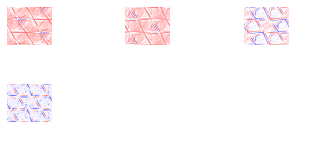

In [22]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps[:,:,200].T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()

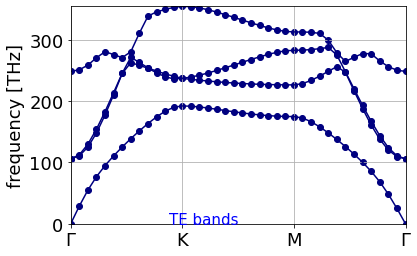

In [35]:
#THz表示
a = 400
c_const = 299792458

fontsize = 18
te_freqs_THz = np.array(te_freqs) * c_const/(a*10**3)
te_gaps_THz = np.array(te_gaps) * c_const/(a*10**3)
#print(te_freqs_THz)

fig, ax = plt.subplots()

x = range(len(te_freqs))

for xz, tez in zip(x, te_freqs_THz):
    ax.scatter([xz]*len(tez), tez, color='navy')

ax.plot(te_freqs_THz, color='navy')
ax.set_ylim([te_freqs_THz.min(), te_freqs_THz.max()])
ax.set_xlim([x[0], x[-1]])

for gap in te_gaps_THz:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

ax.text(11.5, 0, 'TE bands', color='blue', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fontsize)
ax.set_ylabel('frequency [THz]', size=fontsize)
plt.tick_params(labelsize=fontsize)
ax.grid(True)

plt.show()

In [29]:
def lightline_hex(k):
    y = []
    for i in range(len(k)):
        kmod = np.mod(k[i],3)
        y.append(2/3 * kmod * (0 <= kmod < 1) + 1/2*np.sqrt(1/9*(kmod-5)**2 + 1/3*(kmod-1)**2) * (1 <= kmod < 2) + 1/(np.sqrt(3))*(3-kmod) * (2 <= kmod < 3))
    
    y = np.array(y)
    return y

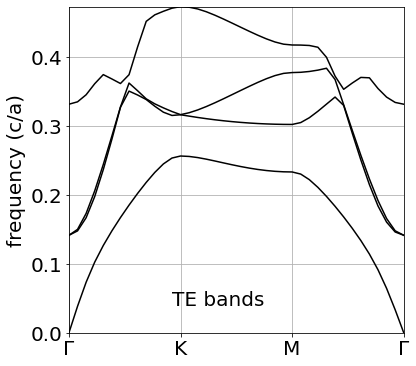

In [36]:
fs = 20

fig, ax = plt.subplots(figsize=(6,6))

x = range(len(te_freqs))

#ax.plot(tm_freqs, color='gray')
ax.plot(te_freqs, color='black')
ax.set_ylim([te_freqs.min(), te_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

#for gap in te_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TE bands', color='black', size=fs)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fs)
ax.set_ylabel('frequency (c/a)', size=fs)
ax.grid(True)
plt.tick_params(labelsize=fs)
plt.savefig("3D_circle.png", bbox_inches="tight")

plt.show()